In [1]:
import os
from PIL import Image
import pandas as pd

In [2]:
parent_directory_all_data = '/Users/andrewtownsend/Desktop/PoriferalVisionWorkspace/porivproj/data/Spicules_sorted_by_shape'

In [6]:
temp_list = []

for sub_directory in os.listdir(parent_directory_all_data):
    sub_directory_path = os.path.join(parent_directory_all_data, sub_directory)
    if os.path.isdir(sub_directory_path):
        for file_name in os.listdir(sub_directory_path):
            file_path = os.path.join(sub_directory_path, file_name)
            if os.path.isfile(file_path):

                try:
                    with Image.open(file_path) as im:

                        temp_list.append({'file_name': file_name, 'class_name': sub_directory, 'height': im.size[1], 'width': im.size[0]})
                except OSError:
                    print("OSError")
                    pass

my_data = pd.DataFrame(temp_list)
my_data.set_index('file_name', inplace=True)

In [7]:
print(my_data)

                        class_name  height  width
file_name                                        
01_169_624_189x175.png   pentactin     175    189
07_1451_20_100x124.png   pentactin     124    100
14_853_20_198x206.png    pentactin     206    198
10_1243_20_183x283.png   pentactin     283    183
04_979_20_194x198.png    pentactin     198    194
...                            ...     ...    ...
06_1709_20_59x559.png   polytylote     559     59
06_809_20_77x375.png    polytylote     375     77
13_897_20_38x431.png    polytylote     431     38
07_1270_20_28x275.png   polytylote     275     28
01_266_20_89x955.png    polytylote     955     89

[3377 rows x 3 columns]


In [12]:
import matplotlib.pyplot as plt

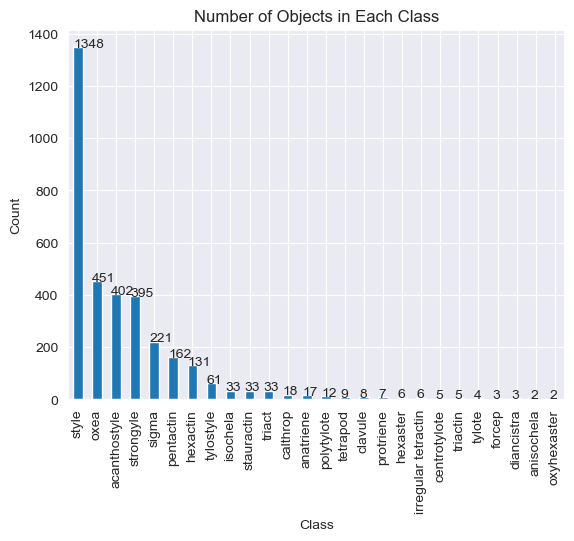

In [16]:
# Group the data by class and count the number of files in each class
counts = my_data.groupby('class_name').size().sort_values(ascending=False)


# Create a bar plot of the data
ax = counts.plot(kind='bar')

# Add labels and title to the plot
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Number of Objects in Each Class')

# Add labels to the bars
for i in ax.patches:
    ax.annotate(str(i.get_height()), (i.get_x(), i.get_height()))

# Show the plot
plt.show()

<AxesSubplot: xlabel='width', ylabel='height'>

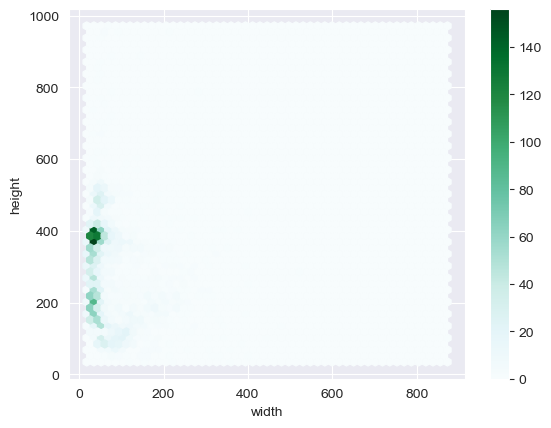

In [18]:
my_data.plot.hexbin(x='width', y='height', gridsize=50)

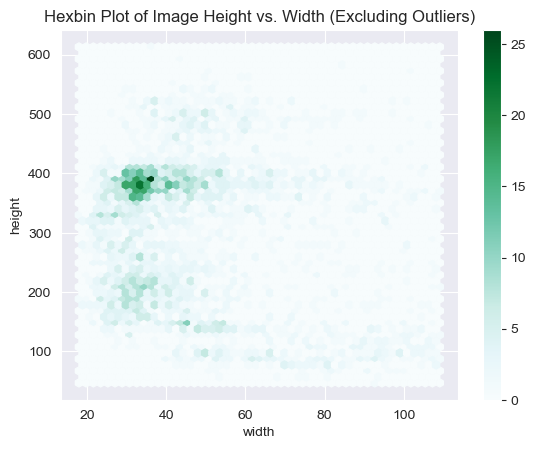

In [19]:
# Calculate the interquartile range of the height and width columns
height_iqr = my_data['height'].quantile(0.75) - my_data['height'].quantile(0.25)
width_iqr = my_data['width'].quantile(0.75) - my_data['width'].quantile(0.25)

# Filter out points that are more than 1.5 times the IQR away from the median
df_filtered = my_data[(my_data['height'] >= my_data['height'].median() - 1.5 * height_iqr) &
                 (my_data['height'] <= my_data['height'].median() + 1.5 * height_iqr) &
                 (my_data['width'] >= my_data['width'].median() - 1.5 * width_iqr) &
                 (my_data['width'] <= my_data['width'].median() + 1.5 * width_iqr)]

# Create a hexbin plot of the filtered height and width columns
df_filtered.plot.hexbin(x='width', y='height', gridsize=50)
plt.title('Hexbin Plot of Image Height vs. Width (Excluding Outliers)')
plt.show()